In [1]:
import pandas as pd
import numpy as np
import random as rnd
import pprint
from itertools import cycle, islice
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
mimic = pd.read_csv(r'mimic_new.csv', index_col=0)


In [3]:
mimic['NUM_PROCEDURES'] = mimic['NUM_PROCEDURES'].replace(np.inf,0)
mimic['NUM_CPTEVENTS'] = mimic['NUM_CPTEVENTS'].replace(np.inf,0)
mimic['NUM_TRANSFERS'] = mimic['NUM_TRANSFERS'].replace(np.inf,0)
mimic['NUM_LABITEMS'] = mimic['NUM_LABITEMS'].replace(np.inf,0)
mimic['NUM_MICROLABS'] = mimic['NUM_MICROLABS'].replace(np.inf,0)
mimic['NUM_NOTEEVENTS'] = mimic['NUM_NOTEEVENTS'].replace(np.inf,0)
mimic['NUM_OUTPUT'] = mimic['NUM_OUTPUT'].replace(np.inf,0)
mimic['NUM_DIAGNOSIS'] = mimic['NUM_DIAGNOSIS'].replace(np.inf,0)
mimic['TOTAL_EVENTS'] = mimic['TOTAL_EVENTS'].replace(np.inf,0)

mimic['NUM_PROCEDURES'] = mimic['NUM_PROCEDURES'].replace(-np.inf,0)
mimic['NUM_CPTEVENTS'] = mimic['NUM_CPTEVENTS'].replace(-np.inf,0)
mimic['NUM_TRANSFERS'] = mimic['NUM_TRANSFERS'].replace(-np.inf,0)
mimic['NUM_LABITEMS'] = mimic['NUM_LABITEMS'].replace(-np.inf,0)
mimic['NUM_MICROLABS'] = mimic['NUM_MICROLABS'].replace(-np.inf,0)
mimic['NUM_NOTEEVENTS'] = mimic['NUM_NOTEEVENTS'].replace(-np.inf,0)
mimic['NUM_OUTPUT'] = mimic['NUM_OUTPUT'].replace(-np.inf,0)
mimic['NUM_DIAGNOSIS'] = mimic['NUM_DIAGNOSIS'].replace(-np.inf,0)
mimic['TOTAL_EVENTS'] = mimic['TOTAL_EVENTS'].replace(-np.inf,0)


In [4]:
mimic['TOTAL_EVENTS'] = mimic['TOTAL_EVENTS'].fillna(0)

In [5]:
#from autoviz.AutoViz_Class import AutoViz_Class

#AV = AutoViz_Class()

In [6]:
#filename = "mimic.csv"
#sep = ","
#dft = AV.AutoViz(
 #   filename,
  #  sep=",",
   # depVar="",
 #   dfte=None,
  #  header=0,
   # verbose=0,
#    lowess=False,
 #   chart_format="svg",
  #  max_rows_analyzed=150000,
   # max_cols_analyzed=30,
#)

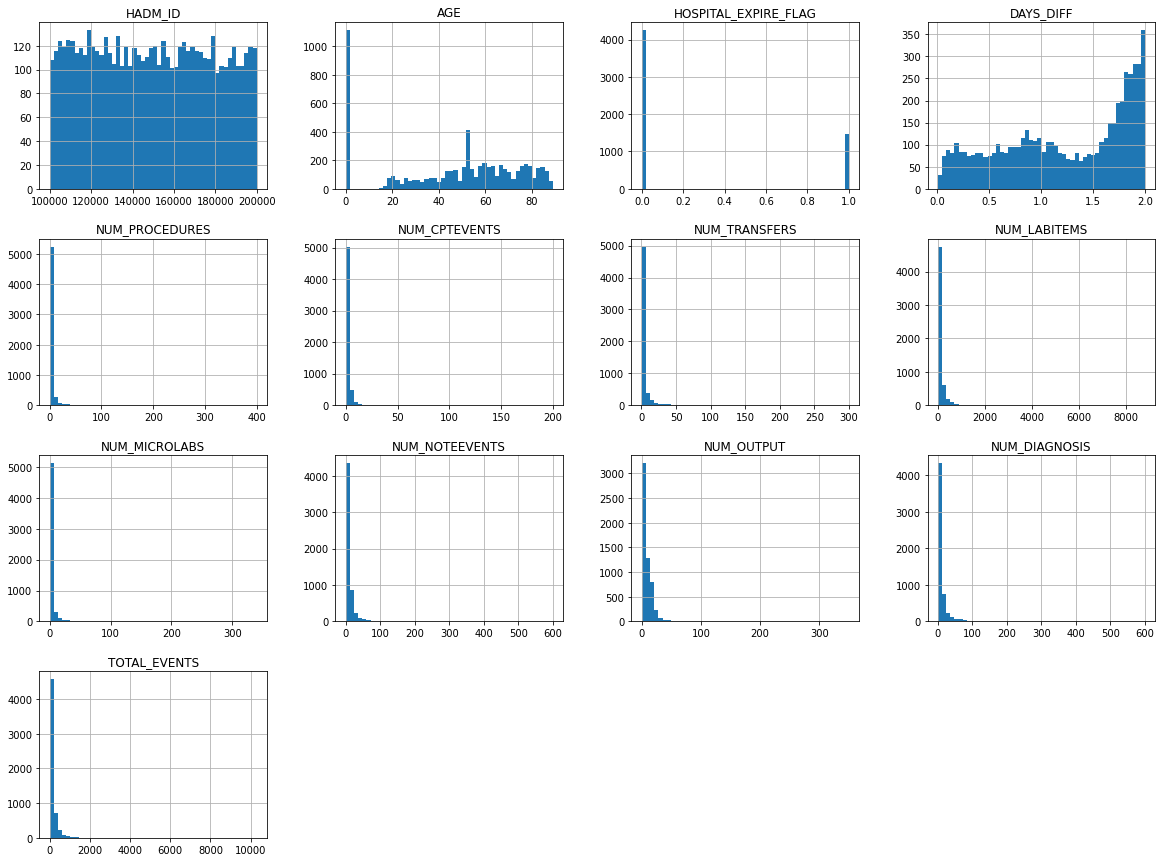

In [7]:
mimic.hist(bins=50, figsize=(20,15))
plt.show()

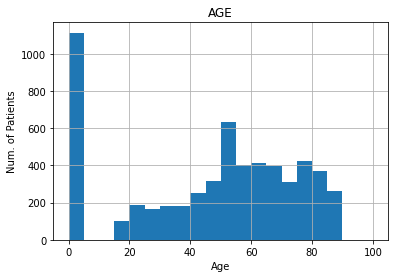

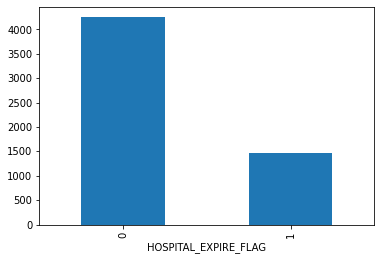

In [8]:
age_histogram = mimic.hist(column='AGE', bins=20, range=[0, 100])
for ax in age_histogram.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Num. of Patients")
plt.show()
mimic.groupby('HOSPITAL_EXPIRE_FLAG').size().plot.bar()
plt.show()

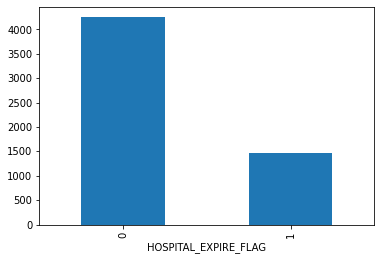

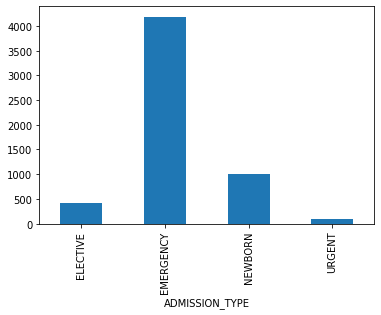

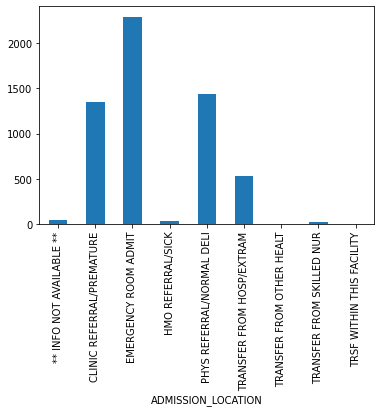

In [9]:
mimic.groupby('HOSPITAL_EXPIRE_FLAG').size().plot.bar()
plt.show()
mimic.groupby('ADMISSION_TYPE').size().plot.bar()
plt.show()
mimic.groupby('ADMISSION_LOCATION').size().plot.bar()
plt.show()

In [10]:
# Label = ExpiredHospital
y = mimic['HOSPITAL_EXPIRE_FLAG']
X = mimic.drop('HOSPITAL_EXPIRE_FLAG', 1)

X = X.drop('DISCHARGE_LOCATION', 1)
X = X.drop('INSURANCE', 1)
X = X.drop('LANGUAGE', 1)
X = X.drop('RELIGION', 1)
X = X.drop('MARITAL_STATUS', 1)
X = X.drop('ETHNICITY', 1)
X = X.drop('DIAGNOSIS', 1)
X = X.drop('ADMIT_PROCEDURE', 1)



print("y - Labels", y.shape)
print("X - No Label  ", X.shape)
print(X.columns)

y - Labels (5710,)
X - No Label   (5710, 15)
Index(['HADM_ID', 'GENDER', 'AGE', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DAYS_DIFF', 'NUM_PROCEDURES', 'NUM_CPTEVENTS', 'NUM_TRANSFERS',
       'NUM_LABITEMS', 'NUM_MICROLABS', 'NUM_NOTEEVENTS', 'NUM_OUTPUT',
       'NUM_DIAGNOSIS', 'TOTAL_EVENTS'],
      dtype='object')


In [12]:
print(X.shape)
categorical_columns = [
                    'ADMISSION_TYPE',                     
                    'ADMISSION_LOCATION',
                    'GENDER']
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    n = len(X[col].unique())
    if (n == 2):
        X[col] = pd.get_dummies(X[col], drop_first=True)
        



(5710, 15)


In [13]:
X_onehot = pd.get_dummies(X)
X_onehot

,HADM_ID,GENDER,AGE,DAYS_DIFF,NUM_PROCEDURES,NUM_CPTEVENTS,NUM_TRANSFERS,NUM_LABITEMS,NUM_MICROLABS,NUM_NOTEEVENTS,NUM_OUTPUT,NUM_DIAGNOSIS,TOTAL_EVENTS,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_HMO REFERRAL/SICK,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,ADMISSION_LOCATION_TRANSFER FROM OTHER HEALT,ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR,ADMISSION_LOCATION_TRSF WITHIN THIS FACILITY
0,165315,0,64,1.14,2.63,0.00,1.75,79.82,0.88,8.77,6.14,6.14,106.13,0,1,0,0,0,0,1,0,0,0,0,0,0
1,115799,1,53,1.97,1.52,1.52,2.03,50.76,0.00,4.06,4.57,4.06,68.52,0,1,0,0,0,0,0,0,0,1,0,0,0
2,196503,0,0,1.94,0.52,0.00,2.06,0.00,0.00,1.55,0.00,1.55,5.68,0,0,1,0,0,1,0,0,0,0,0,0,0
3,190665,0,64,1.83,2.73,0.00,1.09,26.78,0.00,3.83,7.65,5.46,47.54,0,1,0,0,0,1,0,0,0,0,0,0,0
4,198892,0,0,1.98,0.00,0.00,1.52,1.52,0.00,6.06,0.51,1.52,11.13,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705,182540,0,47,0.33,3.03,0.00,9.09,0.00,0.00,6.06,0.00,42.42,60.60,1,0,0,0,0,0,0,0,1,0,0,0,0
5706,127022,0,85,1.94,0.00,1.55,1.03,47.42,2.06,1.55,4.12,7.22,64.95,0,1,0,0,0,1,0,0,0,0,0,0,0
5707,105447,1,88,0.66,3.03,4.55,3.03,178.79,9.09,0.00,18.18,13.64,230.31,0,1,0,0,0,0,1,0,0,0,0,0,0
5708,101071,0,83,0.55,1.82,0.00,3.64,100.00,1.82,1.82,9.09,7.27,125.46,0,1,0,0,0,1,0,0,0,0,0,0,0


In [14]:
X_Not_norm = X_onehot.copy()

In [15]:
X_Not_norm.columns

Index(['HADM_ID', 'GENDER', 'AGE', 'DAYS_DIFF', 'NUM_PROCEDURES',
       'NUM_CPTEVENTS', 'NUM_TRANSFERS', 'NUM_LABITEMS', 'NUM_MICROLABS',
       'NUM_NOTEEVENTS', 'NUM_OUTPUT', 'NUM_DIAGNOSIS', 'TOTAL_EVENTS',
       'ADMISSION_TYPE_ELECTIVE', 'ADMISSION_TYPE_EMERGENCY',
       'ADMISSION_TYPE_NEWBORN', 'ADMISSION_TYPE_URGENT',
       'ADMISSION_LOCATION_** INFO NOT AVAILABLE **',
       'ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE',
       'ADMISSION_LOCATION_EMERGENCY ROOM ADMIT',
       'ADMISSION_LOCATION_HMO REFERRAL/SICK',
       'ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI',
       'ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM',
       'ADMISSION_LOCATION_TRANSFER FROM OTHER HEALT',
       'ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR',
       'ADMISSION_LOCATION_TRSF WITHIN THIS FACILITY'],
      dtype='object')

In [16]:
from sklearn import preprocessing

x = X_Not_norm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=X_Not_norm.columns)
print(XNorm)

       HADM_ID  ...  ADMISSION_LOCATION_TRSF WITHIN THIS FACILITY
0     0.552567  ...                                     -0.018719
1    -1.159598  ...                                     -0.018719
2     1.630986  ...                                     -0.018719
3     1.429119  ...                                     -0.018719
4     1.713593  ...                                     -0.018719
...        ...  ...                                           ...
5705  1.148173  ...                                     -0.018719
5706 -0.771529  ...                                     -0.018719
5707 -1.517550  ...                                     -0.018719
5708 -1.668863  ...                                     -0.018719
5709  1.415253  ...                                     -0.018719

[5710 rows x 26 columns]


In [17]:
XNorm.insert(26,'HOSPITAL_EXPIRY_FLAG',y)

In [18]:
XNorm

,HADM_ID,GENDER,AGE,DAYS_DIFF,NUM_PROCEDURES,NUM_CPTEVENTS,NUM_TRANSFERS,NUM_LABITEMS,NUM_MICROLABS,NUM_NOTEEVENTS,NUM_OUTPUT,NUM_DIAGNOSIS,TOTAL_EVENTS,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_HMO REFERRAL/SICK,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,ADMISSION_LOCATION_TRANSFER FROM OTHER HEALT,ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR,ADMISSION_LOCATION_TRSF WITHIN THIS FACILITY,HOSPITAL_EXPIRY_FLAG
0,0.552567,-1.093688,0.624551,-0.135968,-0.067638,-0.344088,-0.270962,-0.153824,-0.194506,-0.065415,-0.173540,-0.247299,-0.184937,-0.281047,0.602843,-0.464681,-0.126547,-0.082928,-0.555367,1.219843,-0.077396,-0.580181,-0.320867,-0.018719,-0.060756,-0.018719,0
1,-1.159598,0.914337,0.234657,1.225379,-0.155011,-0.087890,-0.245669,-0.278703,-0.270152,-0.310013,-0.292950,-0.332631,-0.314878,-0.281047,0.602843,-0.464681,-0.126547,-0.082928,-0.555367,-0.819777,-0.077396,-0.580181,3.116560,-0.018719,-0.060756,-0.018719,0
2,1.630986,-1.093688,-1.643924,1.176173,-0.233725,-0.344088,-0.242959,-0.496834,-0.270152,-0.440362,-0.640532,-0.435603,-0.531988,-0.281047,-1.658808,2.152014,-0.126547,-0.082928,1.800611,-0.819777,-0.077396,-0.580181,-0.320867,-0.018719,-0.060756,-0.018719,0
3,1.429119,-1.093688,0.624551,0.995754,-0.059766,-0.344088,-0.330581,-0.381753,-0.270152,-0.321958,-0.058694,-0.275196,-0.387363,-0.281047,0.602843,-0.464681,-0.126547,-0.082928,1.800611,-0.819777,-0.077396,-0.580181,-0.320867,-0.018719,-0.060756,-0.018719,0
4,1.713593,-1.093688,-1.643924,1.241780,-0.274657,-0.344088,-0.291738,-0.490302,-0.270152,-0.206150,-0.601742,-0.436833,-0.513158,-0.281047,-1.658808,2.152014,-0.126547,-0.082928,1.800611,-0.819777,-0.077396,-0.580181,-0.320867,-0.018719,-0.060756,-0.018719,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705,1.148173,-1.093688,0.021987,-1.464511,-0.036152,-0.344088,0.392072,-0.496834,-0.270152,-0.206150,-0.640532,1.241077,-0.342241,3.558130,-1.658808,-0.464681,-0.126547,-0.082928,-0.555367,-0.819777,-0.077396,1.723599,-0.320867,-0.018719,-0.060756,-0.018719,0
5706,-0.771529,-1.093688,1.368894,1.176173,-0.274657,-0.082833,-0.336001,-0.293056,-0.093070,-0.440362,-0.327176,-0.202993,-0.327212,-0.281047,0.602843,-0.464681,-0.126547,-0.082928,1.800611,-0.819777,-0.077396,-0.580181,-0.320867,-0.018719,-0.060756,-0.018719,1
5707,-1.517550,0.914337,1.475229,-0.923253,-0.036152,0.422821,-0.155338,0.271481,0.511243,-0.520857,0.742188,0.060386,0.244101,-0.281047,0.602843,-0.464681,-0.126547,-0.082928,-0.555367,1.219843,-0.077396,-0.580181,-0.320867,-0.018719,-0.060756,-0.018719,1
5708,-1.668863,-1.093688,1.298004,-1.103672,-0.131396,-0.344088,-0.100235,-0.067104,-0.113701,-0.426341,0.050828,-0.200941,-0.118152,-0.281047,0.602843,-0.464681,-0.126547,-0.082928,1.800611,-0.819777,-0.077396,-0.580181,-0.320867,-0.018719,-0.060756,-0.018719,1


# Feature selection and Ranking

In [19]:
from sklearn.ensemble import RandomForestClassifier
num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100, random_state=999)
model_rfi.fit(X_Not_norm, y)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
best_features_rfi = X_Not_norm.columns[fs_indices_rfi].values


In [20]:
best_features_rfi

array(['TOTAL_EVENTS', 'NUM_LABITEMS', 'AGE', 'NUM_OUTPUT',
       'NUM_NOTEEVENTS', 'NUM_DIAGNOSIS', 'NUM_PROCEDURES',
       'NUM_MICROLABS', 'NUM_CPTEVENTS', 'DAYS_DIFF'], dtype=object)

In [21]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi


array([0.19237246, 0.16097837, 0.09760752, 0.08231694, 0.05925513,
       0.05813818, 0.05462865, 0.05420194, 0.05337913, 0.04734321])

In [22]:
def plot_imp(best_features, scores, method_name, color):
 
 df = pd.DataFrame({'features': best_features,'importances': scores})
 
 fig, ax = plt.subplots(figsize =(15,5))
 g= sns.barplot(ax=ax, x = "features" , y = "importances" , data= df)
 g.set_xticklabels(ax.get_xticklabels(),rotation = 30)


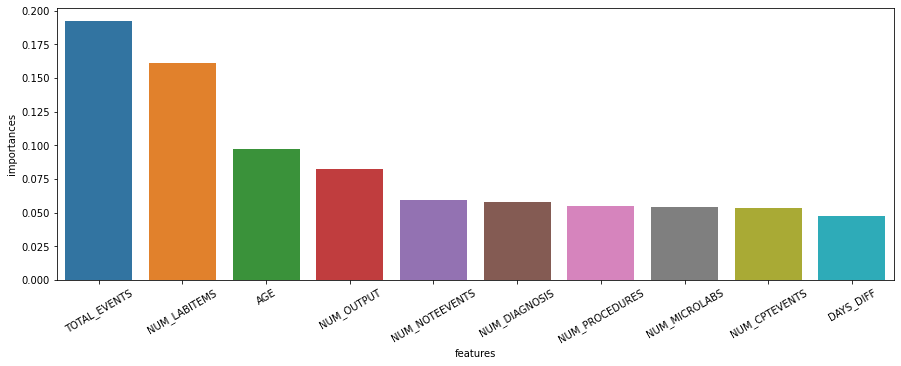

In [23]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'red')

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.3, random_state=42)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (3997, 27)
X_test:  (1713, 27)
y_train:  (3997,)
y_test:  (1713,)


In [25]:
X_train_fs = X_train.iloc[:, fs_indices_rfi]
X_test_fs = X_test.iloc[:, fs_indices_rfi]

In [26]:
# Test Models and evaluation metric
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

seed = 7
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
#Mymodels.append(('LogReg', LogisticRegression()))
Mymodels.append(('RandomForest', RandomForestClassifier()))
#Mymodels.append(('SGDclassifier', SGDClassifier()))
#Mymodels.append(('KNearestNeighbors', KNeighborsClassifier()))
#Mymodels.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
#Mymodels.append(('GaussianNB', GaussianNB()))
#Mymodels.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=None,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_fs, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

RandomForest: 0.900174 (0.013812)


In [27]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid, cv=5,verbose=5,n_jobs = -1, scoring='accuracy') 
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [28]:
model_RF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = 1-np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = 1-np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

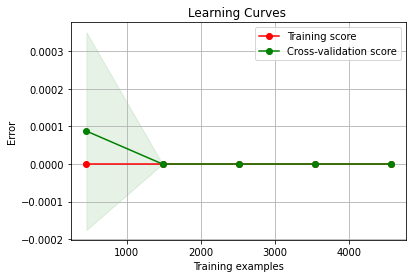

In [30]:

title = "Learning Curves "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model_RF, title, XNorm, y, cv=cv, n_jobs=5)

In [31]:
model.fit(X_train_fs, y_train)
final_predictions = model.predict(X_test_fs)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)

TP = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TN = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  338
FP:  55
FN:  122
TP:  1198
0.9075757575757576 0.9561053471667997


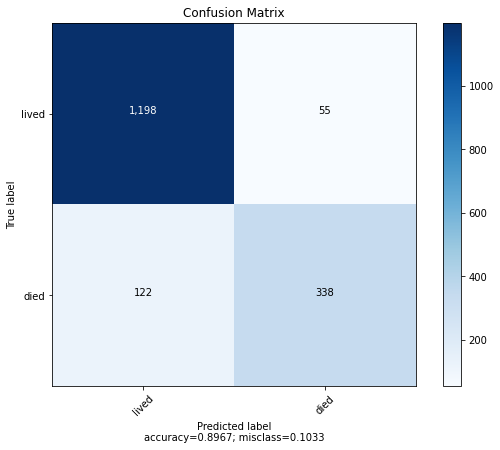

In [34]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

In [35]:
seed = 7
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
Mymodels.append(('LogReg', LogisticRegression()))


# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train_fs, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

LogReg: 0.882157 (0.020709)


In [36]:
model_LR = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

# Create grid search object

clf = GridSearchCV(model_LR, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(XNorm, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


In [37]:
print(best_clf.best_estimator_)

LogisticRegression(C=0.004832930238571752, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [38]:
model_LR = LogisticRegression(C=0.004832930238571752, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

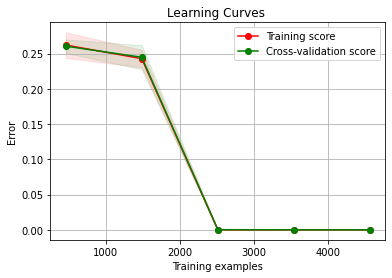

In [39]:
title = "Learning Curves "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model_LR, title, XNorm, y, cv=cv, n_jobs=5)

In [40]:
model_LR.fit(X_train_fs, y_train)
final_predictions = model_LR.predict(X_test_fs)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)

TP = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TN = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  201
FP:  17
FN:  259
TP:  1236
0.8267558528428094 0.9864325618515563


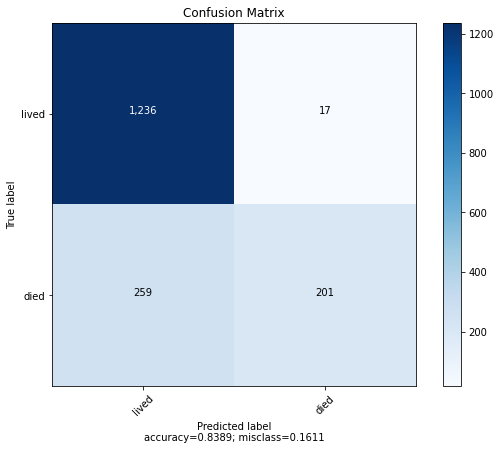

In [41]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

In [42]:
seed = 7
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []

Mymodels.append(('KNearestNeighbors', KNeighborsClassifier()))


# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=None,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_fs, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

KNearestNeighbors: 0.884162 (0.010570)


In [43]:
model_knn = KNeighborsClassifier()

param_grid ={'n_neighbors': [1, 5, 10, 15, 20, 25, 30], 'p': [1, 2]}

knn = GridSearchCV(model_knn, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

best_clf = knn.fit(XNorm, y)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   18.9s finished


In [44]:
print(best_clf.best_params_)

{'n_neighbors': 1, 'p': 1}


In [45]:
model_Knn = KNeighborsClassifier(n_neighbors=1, p= 1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

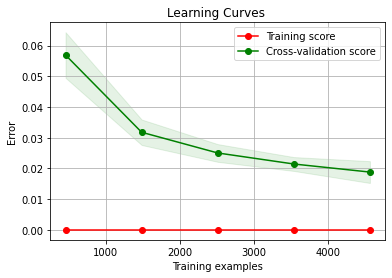

In [46]:
title = "Learning Curves "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model_Knn, title, XNorm, y, cv=cv, n_jobs=5)

In [47]:
model_Knn.fit(X_train_fs, y_train)
final_predictions = model_Knn.predict(X_test_fs)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)

TP = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TN = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  308
FP:  104
FN:  152
TP:  1149
0.8831667947732513 0.9169992019154031


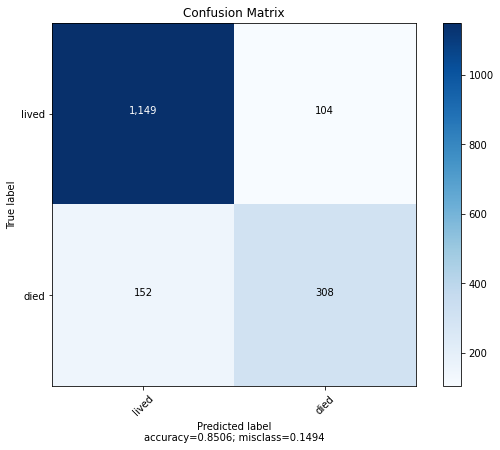

In [48]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

In [49]:
seed = 7
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
Mymodels.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=None,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_fs, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

DecisionTreeClassifier: 0.848633 (0.015176)


In [50]:
df_classifier = DecisionTreeClassifier(random_state=999)

params_grid = {'max_depth': [3,4,5,6],
             'min_samples_split': [3,6,9,10,15]}

In [51]:
model_DT = GridSearchCV(df_classifier, param_grid = params_grid, cv = 5, verbose=True, n_jobs=-1)

best_DT = model_DT.fit(XNorm, y)
print(best_DT.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'max_depth': 3, 'min_samples_split': 3}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.0s finished


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

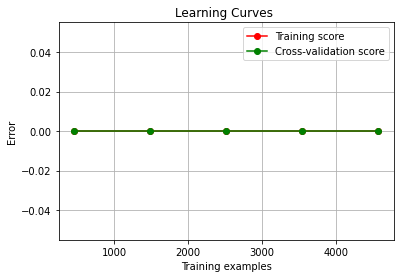

In [52]:
model_DT = DecisionTreeClassifier(max_depth=5, min_samples_split= 15)
title = "Learning Curves "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model_DT, title, XNorm, y, cv=cv, n_jobs=5)

In [53]:
model_DT.fit(X_train_fs, y_train)
final_predictions = model_DT.predict(X_test_fs)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)

TP = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TN = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  328
FP:  82
FN:  132
TP:  1171
0.898695318495779 0.9345570630486831


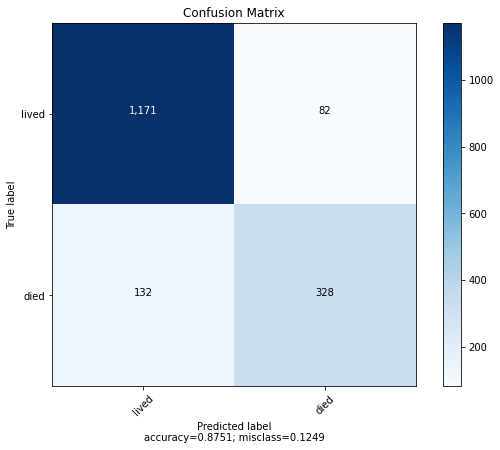

In [54]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

In [55]:
import tensorflow as tf
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense
from keras.utils import np_utils

model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(26,)))
#model.add(layers.BatchNormalization())
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# FIT / TRAIN model

NumEpochs = 100
BatchSize = 10

model.compile(optimizer=optimizers.Adam(lr=1e-5), loss='binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(X_train_fs, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(X_test_fs, y_test))

results = model.evaluate(X_test_fs, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              55296     
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2049      
Total params: 8,450,049
Trainable params: 8,450,049
Non-trainable params: 0
______________________________________________

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [56]:
#conda create -n tensorflow python=3.5
#activate tensorflow
#pip install --ignore-installed --upgrade tensorflow

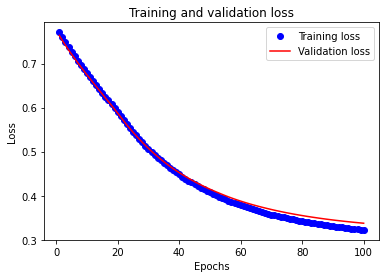

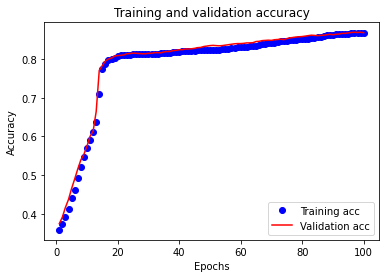

In [57]:

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, (len(history_dict['binary_accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:

final_predictions = model.predict(X_test_fs)
final_predictions.shape

(1713, 1)

In [59]:
Preds = final_predictions.copy()
#print(len(Preds))
#print(Preds)
Preds[ np.where( Preds >= 0.5 ) ] = 1
Preds[ np.where( Preds < 0.5 ) ] = 0

In [60]:

conf_mx = confusion_matrix(y_test, Preds)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  1195
FP:  58
FN:  169
TP:  291
0.6326086956521739 0.833810888252149


In [61]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

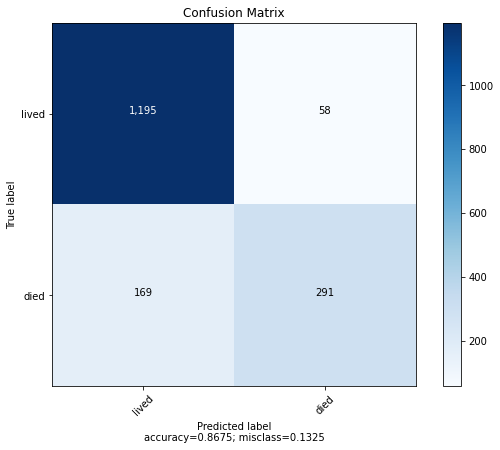

In [62]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

In [63]:
print ('precision ',precision_score(y_test, Preds))
print ('recall ',recall_score(y_test, Preds) )
print ('accuracy ',accuracy_score(y_test, Preds))
print ('F1 score ',f1_score(y_test, Preds))

precision  0.833810888252149
recall  0.6326086956521739
accuracy  0.8674839462930531
F1 score  0.7194066749072929


AUC: 0.793


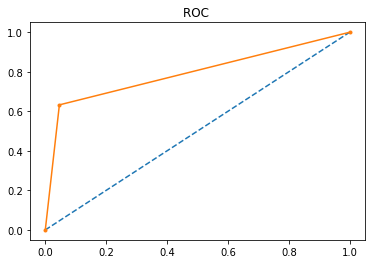

In [64]:
# calculate AUC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, Preds)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, Preds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC ')
# show the plot
plt.show()

f1=0.719 ap=0.626


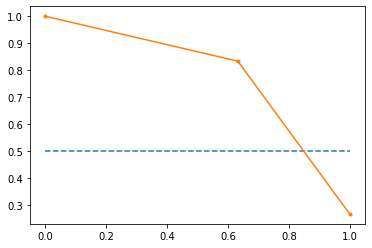

In [65]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, Preds)
# calculate F1 score
f1 = f1_score(y_test, Preds)
# calculate precision-recall AUC
#auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, Preds)
print('f1=%.3f ap=%.3f' % (f1, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()